
<table>
<tr>
<td width=15%><img src="./img/UGA.png"></img></td>
<td><center><h1>Convex and Distributed Optimization</h1></center></td>
<td width=15%><a href="http://www.iutzeler.org" style="font-size: 16px; font-weight: bold">Franck Iutzeler</a><br/>2018/2019 </td>
</tr>
</table>


<br/><br/><div id="top"></div>

<center><a style="font-size: 40pt; font-weight: bold">Lab. 1 - Incremental algorithms </a></center>

<br/>

---

In [1]:
import lib.notebook_setting as nbs
import warnings

warnings.filterwarnings('ignore')

packageList = ['IPython', 'numpy', 'matplotlib', 'pandas' , 'sklearn']
nbs.packageCheck(packageList)

nbs.cssStyling()

[Python version] 	3.7.0 (default, Jun 28 2018, 13:15:42) 
[GCC 7.2.0]

[Packages versions]

IPython             :	6.5.0
numpy               :	1.15.1
matplotlib          :	2.2.3
pandas              :	0.23.4
sklearn             :	0.19.2


<b>Outline</b><br/><br/>
&nbsp;&nbsp;&nbsp; 1) <a href="#Classif"> Classification </a><br/>
&nbsp;&nbsp;&nbsp; 2) <a href="#Student"> Basic Manipulations on Datasets</a><br/>
&nbsp;&nbsp;&nbsp; 3) <a href="#Optim"> Logisitic loss optimization </a><br/>
&nbsp;&nbsp;&nbsp; 4) <a href="#Incremental"> Incremental algorithms </a><br/>
&nbsp;&nbsp;&nbsp; 5) <a href="#LS"> Larger-scale experiments </a><br/>

<div class="warn"><b>Warning:</b> This lab assumes basic knowledge about Python and basic machine learning libraries (numpy, scikit-learn, pandas). If you are not familiar with those, check out <a href="https://github.com/iutzeler/Introduction-to-Python-for-Data-Sciences">this introduction</a>. </div>


## <a id="Classif"> 1) Classification</a>  


<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>



The problem of classfication if the one of finding rules for assigning a class to a given vector from already classified data, for instance, the 2D points below:

[[-9.46919425e-01 -2.13903597e+00]
 [-2.72610707e+00 -5.06186514e+00]
 [-2.24209576e+00 -1.29901759e+00]
 [-1.93127085e+00  1.95574242e-01]
 [-9.83070494e-01 -2.42695118e-04]] [1 1 0 0 0]


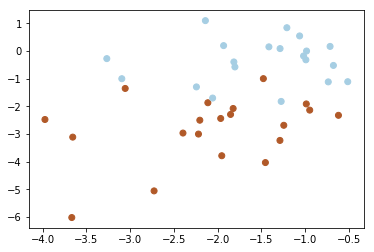

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

# we create 40 separable points in R^2 around 2 centers
X, y = make_blobs(n_samples=40, n_features=2, centers=2 , random_state=48443)

print(X[:5,:],y[:5]) # print the first 5 points and labels

plt.scatter(X[:, 0], X[:, 1], c=y,  cmap=plt.cm.Paired);

Support Vector Machines (SVM) are based on learning a vector $w$ and an intercept $b$ such that the hyperplane $w^T x - b = 0$ separates the data i.e.  $a$ belongs to one class if  $w^T a - b > 0$ and the other elsewhere. 


The ``scikit-learn`` library provides a classification module:

In [3]:
from sklearn.svm import SVC # Support vector classifier i.e. Classifier by SVM

modelSVMLinear = SVC(kernel="linear")
modelSVMLinear.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

The following illustration can be found in the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas.

In [4]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',levels=[ 0], alpha=0.5,    linestyles=[ '--'])
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

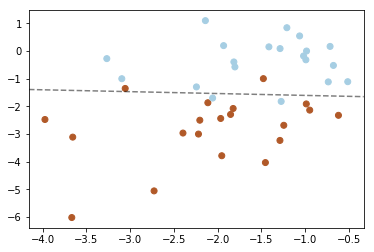

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y ,  cmap=plt.cm.Paired)
plot_svc_decision_function(modelSVMLinear)

We see clearly that the linear SVM seeks at maximizing the *margin* between the hyperplane and the two well defined classes from the data. 

## <a id="Student"> 2) Basic Manipulations on Datasets </a>  


<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>



We will consider the <a href="http://archive.ics.uci.edu/ml/datasets/Student+Performance">student performance</a> dataset. The goal is to predict if the student will pass (i.e. the final grade is greater than 12) from the other information, we get from the documentation:

Pandas allows for easy reading and provides a dataframe of the dataset.

In [6]:
import pandas as pd
import numpy as np

student = pd.read_csv('data/student-mat.csv')
student.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,2,2,0,...,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,T,1,1,1,2,0,...,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,T,1,1,1,2,3,...,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,T,4,2,1,3,0,...,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,T,3,3,1,2,0,...,4,3,2,1,2,5,4,6,10,10


In [7]:
target = pd.DataFrame(student["G3"])
features = student.drop(["G3"],axis=1)

To practice DataFrame operations, we first look at the values of the target and features and investigate basic transformations.

### Target

<div class="exo"> <b>Question:</b> Use Pandas's <tt>applymap</tt> function to transform the target from numerical notes to +1 (pass, note >= 12) and -1 (fail, note < 12).<br/>
<i>Hint: create a function return +1 if the input is >= 12 and -1 elsewhere first and apply this function using <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html">applymap</a>.</i>
</div>

In [8]:
target.head(4)

,G3
0,6
1,6
2,10
3,15


In [9]:
target[target<12]=-1
target[target>=12]=1
#target=target.applymap(lambda x:1 if x>=12 else -1)

---

### Features

One immediate problem here is that the features are not *numeric* (not floats). 

<div class="exo"> <b>Question:</b> Use Pandas's <tt>groupby</tt> function to count the number of boys and girls, and the number of people without Internet access. Finally, use <tt>describe</tt> to get age statistics per sex. </i>
</div>

In [10]:
gsex=features.groupby("sex")
ginternet=features.groupby("internet")
print(gsex["age"].describe())
print("the number of people without internet access is {}".format(ginternet.get_group("no").shape[0]))

     count       mean       std   min   25%   50%   75%   max
sex                                                          
F    208.0  16.730769  1.201696  15.0  16.0  17.0  18.0  20.0
M    187.0  16.657754  1.356181  15.0  16.0  16.0  18.0  22.0
the number of people without internet access is 66


---


Categorical features are not supported natively by optimizers; thankfully, Scikit Learn provides [encoders](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder) to convert categorical (aka nominal, discrete) features to numerical ones.

In [11]:
from sklearn.preprocessing import LabelEncoder

lenc = LabelEncoder()
num_features = features.apply(lenc.fit_transform)

In [12]:
num_features.head() 

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,3,1,0,0,4,4,1,1,0,...,0,3,2,3,0,0,2,6,2,3
1,0,2,1,0,1,1,1,0,1,0,...,0,4,2,2,0,0,2,4,2,2
2,0,0,1,1,1,1,1,0,1,3,...,0,3,2,1,1,2,2,10,4,5
3,0,0,1,0,1,4,2,0,2,0,...,1,2,1,1,0,0,4,2,12,11
4,0,1,1,0,1,3,3,0,1,0,...,0,3,2,1,0,1,4,4,3,7


Even numerical values were encoded, as we are going to normalize, it is not really important. 

The normalization is done by removing the mean and equalizing the variance per feature, in addition, we are going to add an intercept.

In [13]:
from sklearn.preprocessing import StandardScaler, add_dummy_feature

scaler = StandardScaler()
normFeatures = add_dummy_feature(scaler.fit_transform(num_features))

In [14]:
preproData = pd.DataFrame(normFeatures , columns=[ "intercept" ] + list(num_features.columns) )

In [15]:
num_features.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [16]:
preproData.describe().T

,count,mean,std,min,25%,50%,75%,max
intercept,395.0,1.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
sex,395.0,-4.834389e-17,1.001268,-0.948176,-0.948176,-0.948176,1.054656,1.054656
age,395.0,-8.207218e-17,1.001268,-1.330954,-0.546287,0.238380,1.023046,4.161713
address,395.0,6.998621e-17,1.001268,-1.867789,0.535392,0.535392,0.535392,0.535392
famsize,395.0,1.281675e-16,1.001268,-0.636941,-0.636941,-0.636941,1.570004,1.570004
Pstatus,395.0,-1.503720e-16,1.001268,-2.938392,0.340322,0.340322,0.340322,0.340322
Medu,395.0,8.432074e-18,1.001268,-2.514630,-0.685387,0.229234,1.143856,1.143856
Fedu,395.0,-1.264811e-16,1.001268,-2.320084,-0.479857,-0.479857,0.440257,1.360371
traveltime,395.0,-2.248553e-16,1.001268,-0.643249,-0.643249,-0.643249,0.792251,3.663251
studytime,395.0,3.147974e-17,1.001268,-1.235351,-1.235351,-0.042286,-0.042286,2.343844


<div class="exo"> <b>Question:</b> Use Scikit-Learn to split the dataset into learning and training sets with <tt>train_test_split</tt>.
</div>

In [49]:
try:
    from sklearn.model_selection import train_test_split    # sklearn > ...
except:
    from sklearn.cross_validation import train_test_split   # sklearn < ...
    
X_train, X_test, y_train, y_test = train_test_split(preproData,target)

---

Now let us solve this classification problem using scikit learn's routines.

<div class="exo"> <b>Question:</b> Use Scikit-Learn to perform a first classification and evaluate the obtained performance.
</div>

In [31]:
from sklearn.svm import SVC # Support vector classifier i.e. Classifier by SVM
from sklearn.metrics import accuracy_score

modelSVMLinear = SVC(kernel="linear")
modelSVMLinear.fit(X_train,y_train)

y_predict=modelSVMLinear.predict(X_test)

accuracy_score(y_test, y_predict)

/home/hussein/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.898989898989899

---

<div class="warn"><b>Warning:</b> Scikit-learn provides efficient classification routines for up to medium scale datasets. However, to treat larger datasets, it is fundamental to understand the optimization problems and minimization methods.</div>

## <a id="Optim"> 3) Logistic loss Optimization</a>  


<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>



We start the optimization part of the lab.

In our classification setup, the observations are binary in $\{-1 , +1 \}$, and the *Logistic loss* is used to form the following optimization problem
\begin{align*}
\min_{x\in\mathbb{R}^d } f(x) := \frac{1}{m}  \sum_{i=1}^m \log( 1+\exp(-b_i \langle a_i,x \rangle) ) + \frac{\lambda}{2} \|x\|_2^2 .
\end{align*}
where the last term is added as a regularization (of type $\ell_2$, aka Tikhnov) to prevent overfitting. This function is **$L$-smooth and $\lambda$ strongly-convex.**

Under some statistical hypotheses, $x^\star = \arg\min f(x)$ maximizes the likelihood of the labels knowing the features vector. Then, for a new point $d$ with features vector $a$, 
$$ p_1(a) = \mathbb{P}[a\in \text{ class }  +1] = \frac{1}{1+\exp(-\langle a;x^\star \rangle)} $$
Thus, from $a$, if $p_1(a)$ is close to $1$, one can decide that $d$ belongs to class $1$; and the opposite decision if $p(a)$ is close to $0$. Between the two, the appreciation is left to the data scientist depending on the application.


In [50]:
lam = 0.001 #  REGULARIZATION 


L = 0.25*max(np.linalg.norm(preproData.values,2,axis=1))**2 + lam # Lispchitz constant of f
mu = lam # Strong convexity constant

Below find the oracles functions for f and its gradient (taken from the resfresher course).

In [33]:
XTrain=X_train
yTrain=y_train
def f(x):
    A = XTrain.values
    b = yTrain.values
    l = 0.0
    for i in range(A.shape[0]):
        if b[i] > 0 :
            l += np.log( 1 + np.exp(-np.dot( A[i] , x ) ) ) 
        else:
            l += np.log( 1 + np.exp(np.dot( A[i] , x ) ) ) 
    return l/A.shape[0] + lam/2.0*np.dot(x,x)

In [34]:
def f_grad(x):
    A = XTrain.values
    b = yTrain.values
    g = np.zeros(A.shape[1])
    for i in range(A.shape[0]):
        if b[i] > 0:
            g += -A[i]/( 1 + np.exp(np.dot( A[i] , x ) ) ) 
        else:
            g += A[i]/( 1 + np.exp(-np.dot( A[i] , x ) ) ) 
    return g/A.shape[0] + lam*x

<div class="exo"> <b>Question:</b> Implement a gradient descent algorithm on f and display its results in terms of functional decrease on the training set.
</div>

In [35]:
def gradient_algorithm(f , f_grad , x0 , step , PREC , ITE_MAX ):
    x = np.copy(x0)
    while ITE_MAX>0 and (np.abs(f_grad(x))>PREC).any():
        x=x-step*f_grad(x)
        ITE_MAX=ITE_MAX-1 
    return x

In [55]:
step =  0.1# .........................
PREC = 1e-5 # .........................
ITE_MAX = 1000 # .........................
y = gradient_algorithm(f , f_grad , np.zeros(28) , step , PREC , ITE_MAX )

In [56]:
def p(a,xstar):
    return 1/(1+np.exp(-(a.dot(xstar.T))))
y_predict2=p(X_test,y)
y_predict2[y_predict2<0.5]=-1
y_predict2[y_predict2>=0.5]=1
accuracy_score(y_test,y_predict2)

0.9090909090909091

<div class="exo"> <b>Question:</b> Plot the confusion matrix on the testing set.
</div>

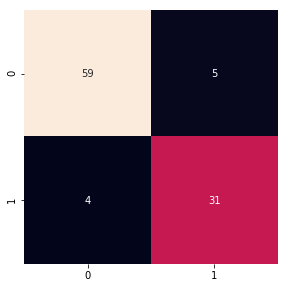

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict2)

import seaborn as sns
fig=plt.figure(figsize=(10,10))
#ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
sns.heatmap(cm,square=True,annot=True,cbar=False,ax=ax2)

## <a id="Incremental"> 4) Incremental Algorithms</a>  


<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>



\begin{align*}
\min_{x\in\mathbb{R}^d } f(x) := \frac{1}{m}  \sum_{i=1}^m \underbrace{ \left(  \log( 1+\exp(-b_i \langle a_i,x \rangle) ) + \frac{\lambda}{2m} \|x\|_2^2 \right)}_{f_i(x)}.
\end{align*}

<div class="exo"> <b>Question:</b> Define the oracle for the gradient based on only one training example $\nabla f_i(x)$.</div>

In [58]:
lam2 = 0.001 #  REGULARIZATION 
L2 = 0.25*max(np.linalg.norm(preproData.values,2,axis=1))**2 + lam
mu2 = lam2
def g_grad(x,i):
    A = XTrain.values
    b = yTrain.values
    g = np.zeros(A.shape[1])
    if b[i] > 0:
        return -A[i]/( 1 + np.exp(np.dot( A[i] , x ) ) ) + lam2*x/A.shape[0]
    else:
        return A[i]/( 1 + np.exp(-np.dot( A[i] , x ) ) ) + lam2*x/A.shape[0]

<div class="exo"> <b>Question:</b> Implement a stochastic gradient descent algorithm.<br/>
<i>Hint: use <tt>np.random.choice</tt> to draw an example.</i></div>

In [59]:
import random
import datetime

def gradient_algorithm(f , f_grad , x0 , step , PREC , ITE_MAX ):
    x = np.copy(x0)
    while ITE_MAX>0:
        x=x-step*f_grad(x)
        ITE_MAX=ITE_MAX-1 
    return x
def sgd(g_grad,x0,step, PREC , ITE_MAX,XTrain=XTrain):
    x=np.copy(x0)
    while ITE_MAX>0:
        i=random.randint(0,XTrain.shape[0]-1)
        x=x-step*g_grad(x,i)
        ITE_MAX=ITE_MAX-1 
    return x



<div class="exo"> <b>Question:</b> Implement SAGA and SVRG algorithms on the previous problem and compare with the gradient in terms of loss vs. number of passes over the data and time.</div>

In [66]:
def saga1(g_grad,x0,step, PREC , ITE_MAX,XTrain=XTrain):
    mem=np.zeros((XTrain.shape[0],XTrain.shape[1]))
    xk=np.copy(x0)
    while ITE_MAX>0:
        i=random.randint(0,XTrain.shape[0]-1)
        current_grad=g_grad(xk,i)
        old_mem=mem[i]
        mem[i]=current_grad
        gk=current_grad-old_mem+mem.mean(axis=0)
        xk=xk-step*gk
        ITE_MAX=ITE_MAX-1
    return xk


def full_grad(g_grad,x):
    sum=0
    grads=np.array([])
    for i in range(0,XTrain.shape[0]):
        grad_i=g_grad(x,i)
        sum+=g_grad(x,i)
        grads=np.append(grads,grad_i)
    return sum/XTrain.shape[0],grads

def saga(g_grad,x0,step, PREC , ITE_MAX,XTrain=XTrain):
    mem=None
    xk=np.copy(x0)
    pik=0
    while ITE_MAX>0:
        i=random.randint(0,XTrain.shape[0]-1)
        current_grad=g_grad(xk,i)
        if(mem is not None):
            if(mem.shape[0]!=0):
                gk=current_grad-pik+mem.mean(axis=0)
            else:
                gk=current_grad  
        else:
            gk=current_grad
        xk=xk-step*gk
        pik=current_grad
        if (mem is not None):
            mem=np.append(mem,[current_grad],axis=0)
        else:
            mem=np.array([current_grad])
        ITE_MAX=ITE_MAX-1
    return xk

def saga2(g_grad,x0,step, PREC , ITE_MAX,XTrain=XTrain):
    deriv,_=full_grad(g_grad,x0)
    mem=np.repeat(deriv,XTrain.shape[0])
    mem=mem.reshape((XTrain.shape[0],XTrain.shape[1]),order='F')
    #mem=full_grad(g_grad,x0)
    #print(mem)
    xk=np.copy(x0)
    while ITE_MAX>0:
        i=random.randint(0,XTrain.shape[0]-1)
        current_grad=g_grad(xk,i)
        old_mem=mem[i]
        mem[i]=current_grad
        gk=current_grad-old_mem+mem.mean(axis=0)
        xk=xk-step*gk
        ITE_MAX=ITE_MAX-1
    return xk


In [67]:
step =  0.05# .........................
PREC = 1e-5 # .........................
ITE_MAX = 100000 # .........................
import datetime
#using SAGA
start_time_SAGA=datetime.datetime.now()
y_saga = saga(g_grad , np.zeros(28) , step , PREC , ITE_MAX )
finish_time_SAGA=datetime.datetime.now()
y_predict=p(X_test,y_saga)
y_predict[y_predict<0.5]=-1
y_predict[y_predict>=0.5]=1
acc_saga=accuracy_score(y_test,y_predict)

#using SAGA1
start_time_SAGA1=datetime.datetime.now()
y_saga1 = saga1(g_grad , np.zeros(28) , step , PREC , ITE_MAX )
finish_time_SAGA1=datetime.datetime.now()
y_predict1=p(X_test,y_saga1)
y_predict1[y_predict1<0.5]=-1
y_predict1[y_predict1>=0.5]=1
acc_saga1=accuracy_score(y_test,y_predict1)

#using SAGA2
start_time_SAGA2=datetime.datetime.now()
y_saga2 = saga2(g_grad , np.zeros(28) , step , PREC , ITE_MAX )
finish_time_SAGA2=datetime.datetime.now()
y_predict2=p(X_test,y_saga2)
y_predict2[y_predict2<0.5]=-1
y_predict2[y_predict2>=0.5]=1
acc_saga2=accuracy_score(y_test,y_predict2)

# names=['SAGA','SAGA1']
# times=[(finish_time_SAGA-start_time_SAGA).total_seconds(),(finish_time_SAGA1-start_time_SAGA1).total_seconds()]
# accs=[acc_saga*100,acc_saga1*100]
# # plt.plot(names,times)
# # plt.plot(names,accs)
# plt.show()

print("the time ofSAGA is {} and for SAGA1 is {} and for SAGA2 is {}".format((finish_time_SAGA-start_time_SAGA),(finish_time_SAGA1-start_time_SAGA1),(finish_time_SAGA2-start_time_SAGA2)))
print("the accuracy of SAGA is {} and for SAGA1 is {} and for SAGA2 is {}".format(acc_saga,acc_saga1,acc_saga2))

the time ofSAGA is 0:07:56.839557 and for SAGA1 is 0:00:06.248139 and for SAGA2 is 0:00:05.686087
the accuracy of SAGA is 0.9292929292929293 and for SAGA1 is 0.9090909090909091 and for SAGA2 is 0.9090909090909091


In [70]:
def full_grad(g_grad,x):
    sum=0
    grads=np.array([])
    for i in range(0,XTrain.shape[0]):
        grad_i=g_grad(x,i)
        sum+=g_grad(x,i)
        grads=np.append(grads,grad_i)
    return sum/XTrain.shape[0],grads
def svrg(g_grad,x0,step, PREC , ITE_MAX,m):
    xk=np.copy(x0)
    for _ in range(0,ITE_MAX):
        pk,grads,=full_grad(g_grad,xk)
        yi=xk
        for _ in range(0,m):
            i=random.randint(0,XTrain.shape[0]-1)
            gj=g_grad(yi,i)-grads[i]+pk
            yi=yi-step*gj
        xk=yi
    return xk
        
def saga(g_grad,x0,step, PREC , ITE_MAX,XTrain=XTrain):
    mem=None
    xk=np.copy(x0)
    pik=0
    while ITE_MAX>0:
        i=random.randint(0,XTrain.shape[0]-1)
        current_grad=g_grad(xk,i)
        if(mem is not None):
            if(mem.shape[0]!=0):
                gk=current_grad-pik+mem.mean(axis=0)
            else:
                gk=current_grad  
        else:
            gk=current_grad
        xk=xk-step*gk
        pik=current_grad
        if (mem is not None):
            mem=np.append(mem,[current_grad],axis=0)
        else:
            mem=np.array([current_grad])
        ITE_MAX=ITE_MAX-1
    return xk

#using SAGA
    start_time_SAGA=datetime.datetime.now()
    y_saga = saga(g_grad , np.zeros(28) , step , PREC , ITE_MAX )
    finish_time_SAGA=datetime.datetime.now()
    y_predict4=p(X_test,y_saga)
    y_predict4[y_predict4<0.5]=-1
    y_predict4[y_predict4>=0.5]=1
    acc_saga=accuracy_score(y_test,y_predict4)

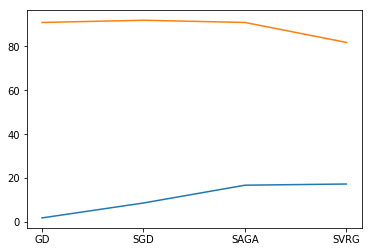

the time of GD is 0:00:01.869632 and for SGD is 0:00:08.673427 and for SAGA is 0:00:16.774915 and for SVRG is 0:00:17.312874
the accuracy of GD is 0.9090909090909091 and for SGD is 0.9191919191919192 and for SAGA is 0.9090909090909091 and for SVRG is 0.8181818181818182


In [82]:
## testing ##

step =  0.05# .........................
PREC = 1e-5 # .........................
ITE_MAX = 1000 # .........................
import pandas as pd

col_names=['NBITE','Algo','Acc','Time']
dataframe=pd.DataFrame(columns=col_names)


#using GD
start_time_GD=datetime.datetime.now()
y = gradient_algorithm(f , f_grad , np.zeros(28) , step , PREC , ITE_MAX )
finish_time_GD=datetime.datetime.now()
y_predict2=p(X_test,y)
y_predict2[y_predict2<0.5]=-1
y_predict2[y_predict2>=0.5]=1
acc_GD=accuracy_score(y_test,y_predict2)

#using SGD
start_time_SGD=datetime.datetime.now()
y_sgd = sgd(g_grad , np.zeros(28) , step , PREC , ITE_MAX* XTrain.shape[0] )
finish_time_SGD=datetime.datetime.now()
y_predict3=p(X_test,y_sgd)
y_predict3[y_predict3<0.5]=-1
y_predict3[y_predict3>=0.5]=1
acc_SGD=accuracy_score(y_test,y_predict3)

#using SAGA
start_time_SAGA=datetime.datetime.now()
y_saga = saga2(g_grad , np.zeros(28) , step , PREC , ITE_MAX*XTrain.shape[0] )
finish_time_SAGA=datetime.datetime.now()
y_predict4=p(X_test,y_saga)
y_predict4[y_predict4<0.5]=-1
y_predict4[y_predict4>=0.5]=1
acc_saga=accuracy_score(y_test,y_predict4)

#using SVRG
start_time_SVRG=datetime.datetime.now()
y_svrg = svrg(g_grad , np.zeros(28) , step , PREC , ITE_MAX,10)
finish_time_SVRG=datetime.datetime.now()
y_predict5=p(X_test,y_svrg)
y_predict5[y_predict5<0.5]=-1
y_predict5[y_predict5>=0.5]=1
acc_svrg=accuracy_score(y_test,y_predict5)

# series=pd.Series({'NBITE':ITE_MAX,'Algo':'GD','Acc':acc_GD,'Time':(finish_time_GD-start_time_GD).total_seconds()})
# dataframe=dataframe.append(series,ignore_index=True)
# series=pd.Series({'NBITE':ITE_MAX,'Algo':'SGD','Acc':acc_SGD,'Time':(finish_time_SGD-start_time_SGD).total_seconds()})
# dataframe=dataframe.append(series,ignore_index=True)
# series=pd.Series({'NBITE':ITE_MAX,'Algo':'SAGA','Acc':acc_saga,'Time':(finish_time_SAGA-start_time_SAGA).total_seconds()})
# dataframe=dataframe.append(series,ignore_index=True)
# series=pd.Series({'NBITE':ITE_MAX,'Algo':'SVRG','Acc':acc_svrg,'Time':(finish_time_SVRG-start_time_SVRG).total_seconds()})
# dataframe=dataframe.append(series,ignore_index=True)

#dataframe

names=['GD','SGD','SAGA','SVRG']
times=[(finish_time_GD-start_time_GD).total_seconds(),(finish_time_SGD-start_time_SGD).total_seconds(),(finish_time_SAGA-start_time_SAGA).total_seconds(),(finish_time_SVRG-start_time_SVRG).total_seconds()]
accs=[acc_GD*100,acc_SGD*100,acc_saga*100,acc_svrg*100]
plt.plot(names,times)
plt.plot(names,accs)
plt.show()


# #comparaison
print("the time of GD is {} and for SGD is {} and for SAGA is {} and for SVRG is {}".format((finish_time_GD-start_time_GD),(finish_time_SGD-start_time_SGD),(finish_time_SAGA-start_time_SAGA),(finish_time_SVRG-start_time_SVRG)))
print("the accuracy of GD is {} and for SGD is {} and for SAGA is {} and for SVRG is {}".format(acc_GD,acc_SGD,acc_saga,acc_svrg))

In [72]:
print("the time of GD is {} and for SGD is {} and for SAGA is {} and for SVRG is {}".format((finish_time_GD-start_time_GD),(finish_time_SGD-start_time_SGD),(finish_time_SAGA-start_time_SAGA),(finish_time_SVRG-start_time_SVRG)))
print("the accuracy of GD is {} and for SGD is {} and for SAGA is {} and for SVRG is {}".format(acc_GD,acc_SGD,acc_saga,acc_svrg))

the time of GD is 0:00:02.271773 and for SGD is 0:00:00.033124 and for SAGA is 0:00:00.086234 and for SVRG is 0:00:18.531546
the accuracy of GD is 0.898989898989899 and for SGD is 0.8787878787878788 and for SAGA is 0.8888888888888888 and for SVRG is 0.8484848484848485


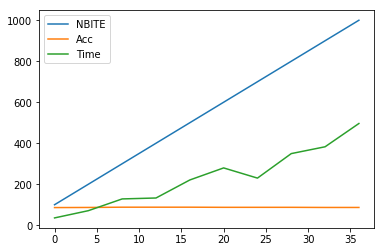

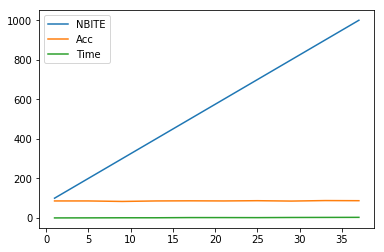

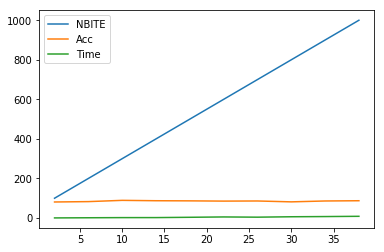

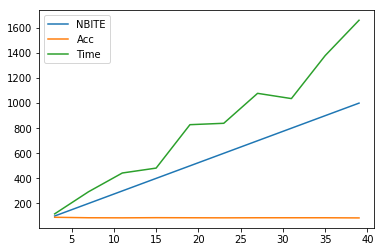

In [88]:
dataframe[dataframe['Algo']=='GD'].plot()
dataframe[dataframe['Algo']=='SGD'].plot()
dataframe[dataframe['Algo']=='SAGA'].plot()
dataframe[dataframe['Algo']=='SVRG'].plot()

## <a id="LS"> 5) Larger-Scale experiments</a>  


<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>



Now, try your code on larger datasets. For instance, you can use the ``covtype`` dataset available at (https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#covtype.binary).

The ``covtype`` dataset is slightly bigger: 581012 examples with 54 features. It represents forest cover type from cartographic variables only (no remotely sensed data) on 30 x 30 meter cell as determined by the US Forest Service (USFS). The features are as follows:

To read and preprocess the dataset one can use the following commands.

<div class="exo"> <b>Question:</b> Compare SGD and SAGA on this dataset.</div>

In [84]:
from sklearn.datasets import load_svmlight_file
from sklearn.preprocessing import StandardScaler, add_dummy_feature
import numpy as np

X, y = load_svmlight_file("././data/covtype.libsvm.binary")

X = np.array(X.todense())

scaler = StandardScaler()
normFeatures = add_dummy_feature(scaler.fit_transform(X))

y = np.sign(y-1.5)
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,train_size=0.75)
Xtrain.shape

(435759, 54)

In [85]:
Xtrain[1:2]

array([[2.873e+03, 6.100e+01, 2.600e+01, 3.230e+02, 4.000e+01, 1.395e+03,
        2.300e+02, 1.750e+02, 6.100e+01, 1.084e+03, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [95]:
def g_grad(x,i,XTrain=Xtrain,yTrain=ytrain):
    A = XTrain
    b = yTrain
    g = np.zeros(A.shape[1])
    if b[i] > 0:
        return -A[i]/( 1 + np.exp(np.dot( A[i] , x ) ) ) + lam2*x/A.shape[0]
    else:
        return A[i]/( 1 + np.exp(-np.dot( A[i] , x ) ) ) + lam2*x/A.shape[0]
#using SGD
start_time_SGD=datetime.datetime.now()
y_sgd = sgd(g_grad , np.zeros(Xtrain.shape[1]) , 0.5 , PREC , 10000,XTrain=Xtrain )
finish_time_SGD=datetime.datetime.now()
y_predict3=p(Xtest,y_sgd)
y_predict3[y_predict3<0.5]=-1
y_predict3[y_predict3>=0.5]=1
acc_SGD=accuracy_score(ytest,y_predict3)
print(acc_SGD)

0.5032598294011139


In [114]:
## testing ##

step =  0.01# .........................
PREC = 1e-5 # .........................
ITE_MAX = 100 # .........................

def g_grad(x,i,XTrain=Xtrain,yTrain=ytrain):
    A = XTrain
    b = yTrain
    g = np.zeros(A.shape[1])
    if b[i] > 0:
        return -A[i]/( 1 + np.exp(np.dot( A[i] , x ) ) ) + lam2*x/A.shape[0]
    else:
        return A[i]/( 1 + np.exp(-np.dot( A[i] , x ) ) ) + lam2*x/A.shape[0]
    



def sgd(g_grad,x0,step, PREC , ITE_MAX,XTrain=XTrain):
    x=np.copy(x0)
    while ITE_MAX>0:
        i=random.randint(0,XTrain.shape[0]-1)
        x=x-step*g_grad(x,i)
        ITE_MAX=ITE_MAX-1 
    return x

def saga(g_grad,x0,step, PREC , ITE_MAX,XTrain=XTrain):
    flags=np.zeros(XTrain.shape[0])
    nbOfOne=0
    mem=np.zeros((XTrain.shape[0],XTrain.shape[1]))
    xk=np.copy(x0)
    while ITE_MAX>0:
        i=random.randint(0,XTrain.shape[0]-1)
        current_grad=g_grad(xk,i)
        old_mem=mem[i]
        if(flags[i]==0):
            flags[i]=1
            nbOfOne=nbOfOne+1
        mem[i]=current_grad
        gk=current_grad-old_mem+mem.mean(axis=0)*(Xtrain.shape[0]/nbOfOne)
        xk=xk-step*gk
        ITE_MAX=ITE_MAX-1
    return xk


def full_grad(g_grad,x):
    sum=0
    grads=np.array([])
    for i in range(0,XTrain.shape[0]):
        grad_i=g_grad(x,i)
        sum+=g_grad(x,i)
        grads=np.append(grads,grad_i)
    return sum/XTrain.shape[0],grads
            
def f_grad(x):
    A = Xtrain
    b = ytrain
    g = np.zeros(A.shape[1])
    for i in range(A.shape[0]):
        if b[i] > 0:
            g += -A[i]/( 1 + np.exp(np.dot( A[i] , x ) ) ) 
        else:
            g += A[i]/( 1 + np.exp(-np.dot( A[i] , x ) ) ) 
    return g/A.shape[0] + lam*x
def full_grad(g_grad,x):
    sum=0
    #grads=np.array([])
    for i in range(0,Xtrain.shape[0]):
        grad_i=g_grad(x,i)
        sum+=g_grad(x,i)
        #grads=np.append(grads,grad_i)
    return sum/XTrain.shape[0]#,grads
def gradient_algorithm(f , f_grad , x0 , step , PREC , ITE_MAX ):
    x = np.copy(x0)
    while ITE_MAX>0:
        x=x-step*f_grad(x)
        ITE_MAX=ITE_MAX-1 
    return x

def GD(g_grad , x0 , step , PREC , ITE_MAX):
    x=np.copy(x0)
    while ITE_MAX>0:
        x=x-step*full_grad(g_grad,x)
        ITE_MAX=ITE_MAX-1 
    return x

#using GD
#start_time_GD=datetime.datetime.now()
#y = GD(g_grad , np.zeros(Xtrain.shape[1]) , step , PREC , ITE_MAX )
#finish_time_GD=datetime.datetime.now()
#y_predict2=p(Xtest,y)
#y_predict2[y_predict2<0.5]=-1
#y_predict2[y_predict2>=0.5]=1
#acc_GD=accuracy_score(ytest,y_predict2)
#acc=0.66
#time=1h

#using SGD
start_time_SGD=datetime.datetime.now()
y_sgd = sgd(g_grad , np.zeros(Xtrain.shape[1]) , 0.2 , PREC , 10000,XTrain=Xtrain )
finish_time_SGD=datetime.datetime.now()
y_predict3=p(Xtest,y_sgd)
y_predict3[y_predict3<0.5]=-1
y_predict3[y_predict3>=0.5]=1
acc_SGD=accuracy_score(ytest,y_predict3)

#using SAGA
start_time_SAGA=datetime.datetime.now()
y_saga = saga(g_grad , np.zeros(Xtrain.shape[1]) , 0.2 , PREC , 10000,XTrain=Xtrain)
finish_time_SAGA=datetime.datetime.now()
y_predict4=p(Xtest,y_saga)
y_predict4[y_predict4<0.5]=-1
y_predict4[y_predict4>=0.5]=1
acc_saga=accuracy_score(ytest,y_predict4)

# #using SAGA1
# start_time_SAGA1=datetime.datetime.now()
# y_saga1 = saga1(g_grad , np.zeros(Xtrain.shape[1]) , 0.005 , PREC , 10000,XTrain=Xtrain)
# finish_time_SAGA1=datetime.datetime.now()
# y_predict11=p(Xtest,y_saga1)
# y_predict11[y_predict11<0.5]=-1
# y_predict11[y_predict11>=0.5]=1
# acc_saga1=accuracy_score(ytest,y_predict11)

# #using SAGA2
# start_time_SAGA2=datetime.datetime.now()
# y_saga2 = saga2(g_grad , np.zeros(Xtrain.shape[1]) , step , PREC , 10000 ,XTrain=Xtrain)
# finish_time_SAGA2=datetime.datetime.now()
# y_predict2=p(Xtest,y_saga2)
# y_predict2[y_predict2<0.5]=-1
# y_predict2[y_predict2>=0.5]=1
# acc_saga2=accuracy_score(ytest,y_predict2)

# names=['SGD','SAGA','SAGA1']
# times=[(finish_time_SGD-start_time_SGD).total_seconds(),(finish_time_SAGA-start_time_SAGA).total_seconds(),(finish_time_SAGA1-start_time_SAGA1).total_seconds(),(finish_time_SAGA2-start_time_SAGA2).total_seconds()]
# accs=[acc_SGD*100,acc_saga*100,acc_saga1*100,acc_saga2*100]
# plt.plot(names,times)
# plt.plot(names,accs)
# plt.show()
# #comparaison
# print("the time of SGD is {} and for SAGA is {} and for SAGA1 is {} and for SAGA2 is {}".format((finish_time_SGD-start_time_SGD),(finish_time_SAGA-start_time_SAGA),(finish_time_SAGA1-start_time_SAGA1),(finish_time_SAGA2-start_time_SAGA2)))
# print("the accuracy of SGD is {} and for SAGA is {} and for SAGA is {} and for SAGA1 is {}".format(acc_SGD,acc_saga,acc_saga1,acc_saga2))

print("the time of SGD is {} and for SAGA is {}".format((finish_time_SGD-start_time_SGD),(finish_time_SAGA-start_time_SAGA)))
print("the accuracy of SGD is {} and for SAGA is {}".format(acc_SGD,acc_saga))

the time of SGD is 0:00:00.149645 and for SAGA is 0:02:50.663939
the accuracy of SGD is 0.530825525118242 and for SAGA is 0.47660977742284155


In [100]:
print("the time of SGD is {} and for SAGA is {}".format((finish_time_SGD-start_time_SGD),(finish_time_SAGA-start_time_SAGA)))
print("the accuracy of SGD is {} and for SAGA is {}".format(acc_SGD,acc_saga))


the time of SGD is 0:00:00.249890 and for SAGA is 0:07:10.568253
the accuracy of SGD is 0.4896835177242467 and for SAGA is 0.5082717740769553


In [111]:
print("the time of SGD is {} and for SAGA is {}".format((finish_time_SGD-start_time_SGD),(finish_time_SAGA-start_time_SAGA)))
print("the accuracy of SGD is {} and for SAGA is {}".format(acc_SGD,acc_saga))

the time of SGD is 0:00:14.048743 and for SAGA is 0:00:21.700536
the accuracy of SGD is 0.5979222460121305 and for SAGA is 0.46600758676240767


---
